# Multi Objective Optimization

In [1]:
from wpaf_opt import *

x, moo_res_best, p_best, op_obj = wpaf_multi_opt()

In [2]:
print("Non Dominant Objective Functions=\n", moo_res_best.F)
print("Non Dominant Design Variables=\n", moo_res_best.X)

Non Dominant Objective Functions=
 [[ 5.13312102 -3.07983819]
 [ 5.17181444 -3.20775884]
 [ 5.17978733 -3.2372966 ]
 [ 5.17080279 -3.20592263]
 [ 5.17978395 -3.23729426]
 [ 5.16819547 -3.19561774]
 [ 5.15558252 -3.14813083]
 [ 5.17269521 -3.21039984]
 [ 5.17181839 -3.20777503]
 [ 5.1643799  -3.17202464]
 [ 5.16416679 -3.17202045]
 [ 5.13268911 -3.0780337 ]
 [ 5.17110334 -3.20648038]
 [ 5.12603602 -2.99013392]
 [ 5.16416706 -3.17202384]
 [ 5.15655238 -3.15020017]
 [ 5.16446729 -3.17202783]
 [ 5.1326782  -3.07790028]
 [ 5.13365631 -3.08005992]
 [ 5.13312149 -3.0800496 ]
 [ 5.18296854 -3.23729679]
 [ 5.15658276 -3.15058154]
 [ 5.1565526  -3.15020285]
 [ 5.16416639 -3.17201534]
 [ 5.17179095 -3.20746064]
 [ 5.15561179 -3.14860221]
 [ 5.17979166 -3.23729665]
 [ 5.15556636 -3.14756168]
 [ 5.17080299 -3.20592521]
 [ 5.1565523  -3.15019914]
 [ 5.07354354 -2.87701981]
 [ 5.13267873 -3.07790835]
 [ 5.17248095 -3.21028689]
 [ 5.17975783 -3.23717602]
 [ 5.15559481 -3.1485228 ]
 [ 5.15420585 -3.146

# Pareto Front

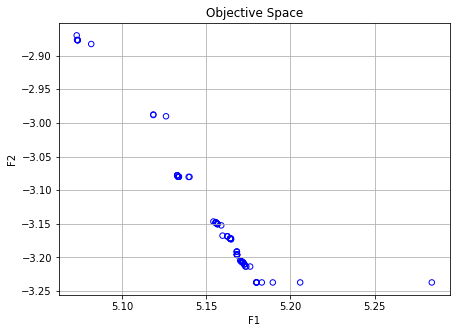

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(moo_res_best.F[:, 0], moo_res_best.F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.xlabel('F1')
plt.ylabel('F2')
plt.grid()
plt.show()

In [4]:
fl = moo_res_best.F.min(axis=0)
fu = moo_res_best.F.max(axis=0)

print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

Scale f1: [5.07296784970032, 5.2839900200326575]
Scale f2: [-3.2372968583802253, -2.8697951601412615]


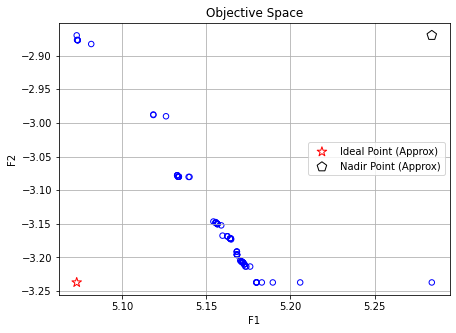

In [5]:
approx_ideal = moo_res_best.F.min(axis=0)
approx_nadir = moo_res_best.F.max(axis=0)

plt.figure(figsize=(7, 5))
plt.scatter(moo_res_best.F[:, 0], moo_res_best.F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(approx_ideal[0], approx_ideal[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ideal Point (Approx)")
plt.scatter(approx_nadir[0], approx_nadir[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
plt.title("Objective Space")
plt.xlabel('F1')
plt.ylabel('F2')
plt.legend()
plt.grid()
plt.show()

Scale f1: [0.0, 1.0]
Scale f2: [0.0, 1.0]


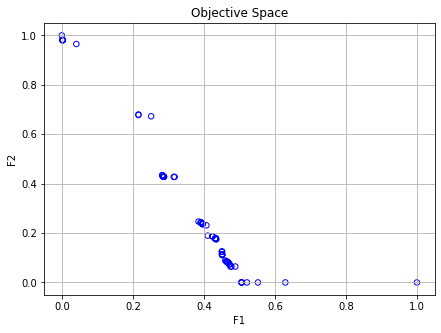

In [6]:
nF = (moo_res_best.F - approx_ideal) / (approx_nadir - approx_ideal)

fl = nF.min(axis=0)
fu = nF.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

plt.figure(figsize=(7, 5))
plt.scatter(nF[:, 0], nF[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.xlabel('F1')
plt.ylabel('F2')
plt.grid()
plt.show()

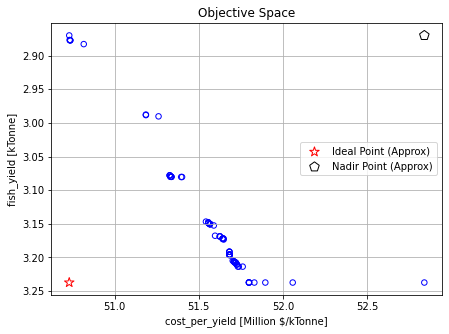

In [7]:
cost_per_yield = 10 * moo_res_best.F[:, 0]
fish_yield = -1 * moo_res_best.F[:, 1]
approx_ideal_tick = [min(cost_per_yield), max(fish_yield)] #min of OBJ
approx_nadir_tick = [max(cost_per_yield), min(fish_yield)] #max of OBJ

plt.figure(figsize=(7, 5))
plt.scatter(cost_per_yield, fish_yield, s=30, facecolors='none', edgecolors='blue')
plt.scatter(approx_ideal_tick[0], approx_ideal_tick[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ideal Point (Approx)")
plt.scatter(approx_nadir_tick[0], approx_nadir_tick[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
plt.title("Objective Space")
plt.xlabel('cost_per_yield [Million $/kTonne]')
plt.ylabel('fish_yield [kTonne]')
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.show()